In [54]:
import pandas as pd
import re
import numpy as np

## Reading in scraped directories from Apr 2022 & Aug 2022

In [109]:
# Scraped NYC-area therapists that mentioned working with ages 6-10 in Apr 2022
oldScrape = pd.read_csv("data/psychology-today-directory-nyc-6to10-0422.csv")
display(oldScrape.head(1))
display(oldScrape.shape)

# Scraped NYC-area therapists that mentioned working with ages 14-18 in Aug 2022
newScrape = pd.read_csv("data/psychology-today-directory-nyc-14to18-0822.csv")
display(newScrape.head(1))
display(newScrape.shape)

,url,name,title,phone,address,statement,verified,zip,finances
0,https://www.psychologytoday.com/us/therapists/...,Ava Dorfman,"Psychologist, PhD",(929) 493-4920,"New York, NY 10003",I provide comprehensive neuropsychological eva...,Verified,10003,\n\n\n\n\n\n\nAccepted Insurance Plans\n\n\n\n...


(3225, 9)

,url,name,title,phone,address,statement,verified,zip,finances
0,https://www.psychologytoday.com/us/therapists/...,Julie Smith,"Marriage & Family Therapist, MHS, LMFT, CSPAT",(720) 523-0323,"New York, NY 10001","Life doesn’t always go according to plan, and ...",Verified,10001,\n\n\n\nCost per Session: $150 - $200\n ...


(3761, 9)

## Concatting the two files

In [110]:
df = pd.concat([newScrape,oldScrape],ignore_index=True)

# Dropping duplicates by name and statement
df = df.drop_duplicates(subset='name', ignore_index=True)
df = df.drop_duplicates(subset='statement', ignore_index=True)

display(df.head())
display(df.shape)

,url,name,title,phone,address,statement,verified,zip,finances
0,https://www.psychologytoday.com/us/therapists/...,Julie Smith,"Marriage & Family Therapist, MHS, LMFT, CSPAT",(720) 523-0323,"New York, NY 10001","Life doesn’t always go according to plan, and ...",Verified,10001,\n\n\n\nCost per Session: $150 - $200\n ...
1,https://www.psychologytoday.com/us/therapists/...,Debora M Worth,"Clinical Social Work/Therapist, LCSW",(646) 480-2924,"New York, NY 10024","After 30+ years of doing this work, I am remin...",Verified,10024,NaN
2,https://www.psychologytoday.com/us/therapists/...,Leah Grunwald,"Clinical Social Work/Therapist, LCSW, LCFP, SI...",(347) 321-9011,"New York, NY 10001",I have trained and specialize in several modal...,Verified,10001,NaN
3,https://www.psychologytoday.com/us/therapists/...,Tabitha Limotte,"Marriage & Family Therapist, MA, LMFT, CEDS",(917) 809-7522,"New York, NY 10001",I am a Licensed Family Therapist specializing ...,Verified,10001,\n\n\n\nCost per Session: $200 - $250\n ...
4,https://www.psychologytoday.com/us/therapists/...,Nora Fitzgerald Moore,"Psychologist, PsyD",(347) 826-5922,"New York, NY 10010",Sometimes you know exactly what the problem mi...,Verified,10010,\n\n\n\nCost per Session: $175 - $250\n ...


(4888, 9)

In [111]:
# How many profiles mention Medicaid?

df.query('finances.str.contains("medicaid",case=False,na=False) or statement.str.contains("medicaid",case=False,na=False)').url.nunique()

77

In [112]:
# What percent of listings mention Medicaid?

77/4888

0.015752864157119476

## Extracting Costs Per Session

Many profiles have a "Cost per Session" listed. Some are ranges, some are bases (125+), some are ceilings (Up to 350). I'm going to extract these figures and create an average.

In [113]:
# Saving a new dataframe
dfCosts = df.query('finances.str.contains("Cost per Session",na=False,case=False)')
dfCosts.shape

(2972, 9)

In [114]:
# Defining a Regex function to get everything after "Cost per session"
def cost_per_session(finances):
    if finances is not None:
        query = re.findall(r"Cost per Session:.*",finances)
        if len(query) > 0:
            return query[0]
        else:
            return None

        
# Create a new column and apply the functioin
dfCosts['cost_per_session'] = dfCosts.finances.apply(cost_per_session)

# Removing "Cost per Session:"
dfCosts.cost_per_session = dfCosts.cost_per_session.str.split(":").str[1]

dfCosts.head()

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_33725/2210738249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCosts['cost_per_session'] = dfCosts.finances.apply(cost_per_session)
/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session
0,https://www.psychologytoday.com/us/therapists/...,Julie Smith,"Marriage & Family Therapist, MHS, LMFT, CSPAT",(720) 523-0323,"New York, NY 10001","Life doesn’t always go according to plan, and ...",Verified,10001,\n\n\n\nCost per Session: $150 - $200\n ...,$150 - $200
3,https://www.psychologytoday.com/us/therapists/...,Tabitha Limotte,"Marriage & Family Therapist, MA, LMFT, CEDS",(917) 809-7522,"New York, NY 10001",I am a Licensed Family Therapist specializing ...,Verified,10001,\n\n\n\nCost per Session: $200 - $250\n ...,$200 - $250
4,https://www.psychologytoday.com/us/therapists/...,Nora Fitzgerald Moore,"Psychologist, PsyD",(347) 826-5922,"New York, NY 10010",Sometimes you know exactly what the problem mi...,Verified,10010,\n\n\n\nCost per Session: $175 - $250\n ...,$175 - $250
5,https://www.psychologytoday.com/us/therapists/...,Dylan Marks,"Clinical Social Work/Therapist, LCSW, MSW, MA,...",(646) 760-4884,"New York, NY 10016",I imagine you may wonder what your life means....,Verified,10016,\n\n\n\nCost per Session: Up to $300\n ...,Up to $300
13,https://www.psychologytoday.com/us/therapists/...,Aliza Ada Scharf-Bendov,"Clinical Social Work/Therapist, LCSWC",(332) 262-6828,"New York, NY 10001",Do you want to improve your relationships? Are...,Verified,10001,\n\n\n\nCost per Session: $175 - $350\n ...,$175 - $350


In [61]:
dfCosts.cost_per_session.value_counts()

 $150 - $200    182
 $200 - $250    119
 $150 - $250    101
 $100 - $150     87
 $200+           67
               ... 
 $200 - $270      1
 $160 - $210      1
 $110 - $130      1
 $185 - $300      1
 $60 - $95        1
Name: cost_per_session, Length: 520, dtype: int64

In [117]:
searchfor = ['[+]','-','Up to']

oneCost = dfCosts[~dfCosts.cost_per_session.str.contains('|'.join(searchfor),na=False,case=False)]
oneCost['one_cost'] = oneCost.cost_per_session.str.replace("$","").astype('int')
oneCost

dfCosts = dfCosts[dfCosts.cost_per_session.str.contains('|'.join(searchfor),na=False,case=False)]

dfCosts = pd.concat([dfCosts,oneCost],ignore_index=True)
dfCosts

Series([], Name: one_cost, dtype: int64)

In [119]:
# Extracting Cost Range
def cost_range(cost_per_session):
    if cost_per_session != None:
        query = re.findall(r"-",cost_per_session)
        if len(query) > 0:
            return cost_per_session
        else:
            return None
    else:
        return None

# Creating new columns, one for the range, one for the low and one for the high
dfCosts['cost_range'] = dfCosts.cost_per_session.apply(cost_range)
dfCosts['cost_low'] = dfCosts.cost_range.str.split("-").str[0].str.replace("$","")
dfCosts['cost_high'] = dfCosts.cost_range.str.split("-").str[1].str.replace("$","")

dfCosts.head(1)

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_33725/2566127844.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfCosts['cost_low'] = dfCosts.cost_range.str.split("-").str[0].str.replace("$","")
/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_33725/2566127844.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfCosts['cost_high'] = dfCosts.cost_range.str.split("-").str[1].str.replace("$","")


,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session,one_cost,cost_range,cost_low,cost_high
0,https://www.psychologytoday.com/us/therapists/...,Julie Smith,"Marriage & Family Therapist, MHS, LMFT, CSPAT",(720) 523-0323,"New York, NY 10001","Life doesn’t always go according to plan, and ...",Verified,10001,\n\n\n\nCost per Session: $150 - $200\n ...,$150 - $200,None,$150 - $200,150,200


In [120]:
# Extracting a cost base

def cost_base(cost_per_session):
    if cost_per_session != None:
        query = re.findall(r"[+]",cost_per_session)
        if len(query) > 0:
            return cost_per_session
        else:
            return None
    else:
        return None
    
dfCosts['cost_base'] = dfCosts.cost_per_session.apply(cost_base).str.replace("$","").str.replace("[+]","")
dfCosts.head(1)

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_33725/2508468419.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfCosts['cost_base'] = dfCosts.cost_per_session.apply(cost_base).str.replace("$","").str.replace("[+]","")
/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_33725/2508468419.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  dfCosts['cost_base'] = dfCosts.cost_per_session.apply(cost_base).str.replace("$","").str.replace("[+]","")


,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session,one_cost,cost_range,cost_low,cost_high,cost_base
0,https://www.psychologytoday.com/us/therapists/...,Julie Smith,"Marriage & Family Therapist, MHS, LMFT, CSPAT",(720) 523-0323,"New York, NY 10001","Life doesn’t always go according to plan, and ...",Verified,10001,\n\n\n\nCost per Session: $150 - $200\n ...,$150 - $200,None,$150 - $200,150,200,None


In [121]:
# Extracting a Cost Ceiling or Limit
def cost_limit(cost_per_session):
    if cost_per_session != None:
        query = re.findall(r"Up to", cost_per_session)
        if len(query) > 0:
            return cost_per_session
        else:
            return None
    else:
        return None

dfCosts['cost_limit'] = dfCosts.cost_per_session.apply(cost_limit).str.split("$").str[1]
dfCosts.head(1)

,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session,one_cost,cost_range,cost_low,cost_high,cost_base,cost_limit
0,https://www.psychologytoday.com/us/therapists/...,Julie Smith,"Marriage & Family Therapist, MHS, LMFT, CSPAT",(720) 523-0323,"New York, NY 10001","Life doesn’t always go according to plan, and ...",Verified,10001,\n\n\n\nCost per Session: $150 - $200\n ...,$150 - $200,None,$150 - $200,150,200,None,None


In [151]:
dfCosts

,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session,one_cost,cost_range,cost_low,cost_high,cost_base,cost_limit,average_cost,all_costs,all_lows,all_highs
0,https://www.psychologytoday.com/us/therapists/...,Julie Smith,"Marriage & Family Therapist, MHS, LMFT, CSPAT",(720) 523-0323,"New York, NY 10001","Life doesn’t always go according to plan, and ...",Verified,10001,\n\n\n\nCost per Session: $150 - $200\n ...,$150 - $200,None,$150 - $200,150.0,200.0,NaN,NaN,175.0,175.0,150.0,200.0
1,https://www.psychologytoday.com/us/therapists/...,Tabitha Limotte,"Marriage & Family Therapist, MA, LMFT, CEDS",(917) 809-7522,"New York, NY 10001",I am a Licensed Family Therapist specializing ...,Verified,10001,\n\n\n\nCost per Session: $200 - $250\n ...,$200 - $250,None,$200 - $250,200.0,250.0,NaN,NaN,225.0,225.0,200.0,250.0
2,https://www.psychologytoday.com/us/therapists/...,Nora Fitzgerald Moore,"Psychologist, PsyD",(347) 826-5922,"New York, NY 10010",Sometimes you know exactly what the problem mi...,Verified,10010,\n\n\n\nCost per Session: $175 - $250\n ...,$175 - $250,None,$175 - $250,175.0,250.0,NaN,NaN,212.5,212.5,175.0,250.0
3,https://www.psychologytoday.com/us/therapists/...,Dylan Marks,"Clinical Social Work/Therapist, LCSW, MSW, MA,...",(646) 760-4884,"New York, NY 10016",I imagine you may wonder what your life means....,Verified,10016,\n\n\n\nCost per Session: Up to $300\n ...,Up to $300,None,None,NaN,NaN,NaN,300.0,NaN,300.0,NaN,300.0
4,https://www.psychologytoday.com/us/therapists/...,Aliza Ada Scharf-Bendov,"Clinical Social Work/Therapist, LCSWC",(332) 262-6828,"New York, NY 10001",Do you want to improve your relationships? Are...,Verified,10001,\n\n\n\nCost per Session: $175 - $350\n ...,$175 - $350,None,$175 - $350,175.0,350.0,NaN,NaN,262.5,262.5,175.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,https://www.psychologytoday.com/us/therapists/...,Amanda Garcia Torres,"Counselor, MA, LMHC",(646) 798-7461,"Office is near: Astoria, NY 11106",You thought you did everything right. School. ...,Verified,11106,\n\n\n\nCost per Session: $200\n \n...,$200,200,None,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN
2968,https://www.psychologytoday.com/us/therapists/...,Hannah Evans,MHC-LP,(917) 451-7251,"Office is near: Astoria, NY 11103",Whether you’re looking to tackle unwanted and ...,Verified,11103,\n\n\n\nCost per Session: $200\n \n...,$200,200,None,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN
2969,https://www.psychologytoday.com/us/therapists/...,Caitlin Rosengarten,"Clinical Social Work/Therapist, LCSW-R",(347) 687-2815,"Office is near: Astoria, NY 11101","Whatever brings you here, I welcome you. Maybe...",Verified,11101,\n\n\n\nCost per Session: $200\n \n...,$200,200,None,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN
2970,https://www.psychologytoday.com/us/therapists/...,Rebecca Ackerman,"Clinical Social Work/Therapist, LCSW, MA",(518) 896-8127,"Office is near: Astoria, NY 11102",Therapy begins with a curiosity. Perhaps you w...,Verified,11102,\n\n\n\nCost per Session: $175\n \n...,$175,175,None,NaN,NaN,NaN,NaN,NaN,175.0,NaN,NaN


In [122]:
# Convert everything to float
dfCosts = dfCosts.astype({'cost_limit':'float','cost_high':'float','cost_low':'float','cost_base':'float'})

In [66]:

# Adding Low + High and dividing by two to get the average
dfCosts['average_cost'] = (dfCosts.cost_low + dfCosts.cost_high)/2

# Adding a new column with both average range and ceiling and floor
dfCosts['all_costs'] = dfCosts.average_cost.fillna(0) + dfCosts.cost_base.fillna(0) + dfCosts.cost_limit.fillna(0) + dfCosts.one_cost.fillna(0)

#Adding an All Low's column and an All High's column
dfCosts['all_lows'] = dfCosts.cost_low.fillna(0) + dfCosts.cost_base.fillna(0)
dfCosts['all_highs'] = dfCosts.cost_high.fillna(0) + dfCosts.cost_limit.fillna(0)
dfCosts.loc[dfCosts.all_lows == 0, "all_lows"] = None
dfCosts.loc[dfCosts.all_highs == 0, "all_highs"] = None

#### Let's get a median average without factoring in the ceiling and floor

In [137]:
print(dfCosts.average_cost.median())

175.0


#### Let's get a median average WITH ceiling and floor and single costs

In [138]:
dfCosts.all_costs.median()

180.0

In [43]:
df_concat = df_concat.drop_duplicates(subset='url')

In [72]:
df_concat_clean.average_cost.mean()

188.74008477141993

In [162]:
# Filtering out one listing that's 4500 for an evaluation
dfCosts.query('cost_high < 1000 or cost_high.isnull()').all_costs.median()

180.0

In [176]:
dfCosts.query('(cost_high < 4000 or cost_high.isnull()) and title.str.contains("psychologist",case=False)').all_costs.median()

235.0

In [181]:
dfCosts.query('(cost_high < 4000 or cost_high.isnull()) and title.str.contains("lcsw",case=False)').all_costs.median()

175.0

In [ ]:
dfCosts.query('(cost_high < 4000 or cost_high.isnull()) and title.str.contains("psychologist",case=False)').all_costs.median()

In [168]:
costs = dfCosts.query('cost_high < 4000 or cost_high.isnull()').all_costs.to_frame()

In [169]:
costs['therapists'] = "therapists"

In [170]:
costs

,all_costs,therapists
0,175.0,therapists
1,225.0,therapists
2,212.5,therapists
3,300.0,therapists
4,262.5,therapists
...,...,...
2967,200.0,therapists
2968,200.0,therapists
2969,200.0,therapists
2970,175.0,therapists


In [174]:
costs.all_costs.median()

180.0

In [171]:
from plotnine import *
import matplotlib.pyplot as plt
from plotnine import *
plt.rcParams['svg.fonttype'] = 'none'

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/geoms/geom_point.py:61: UserWarning: You passed a edgecolor/edgecolors (['#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#0

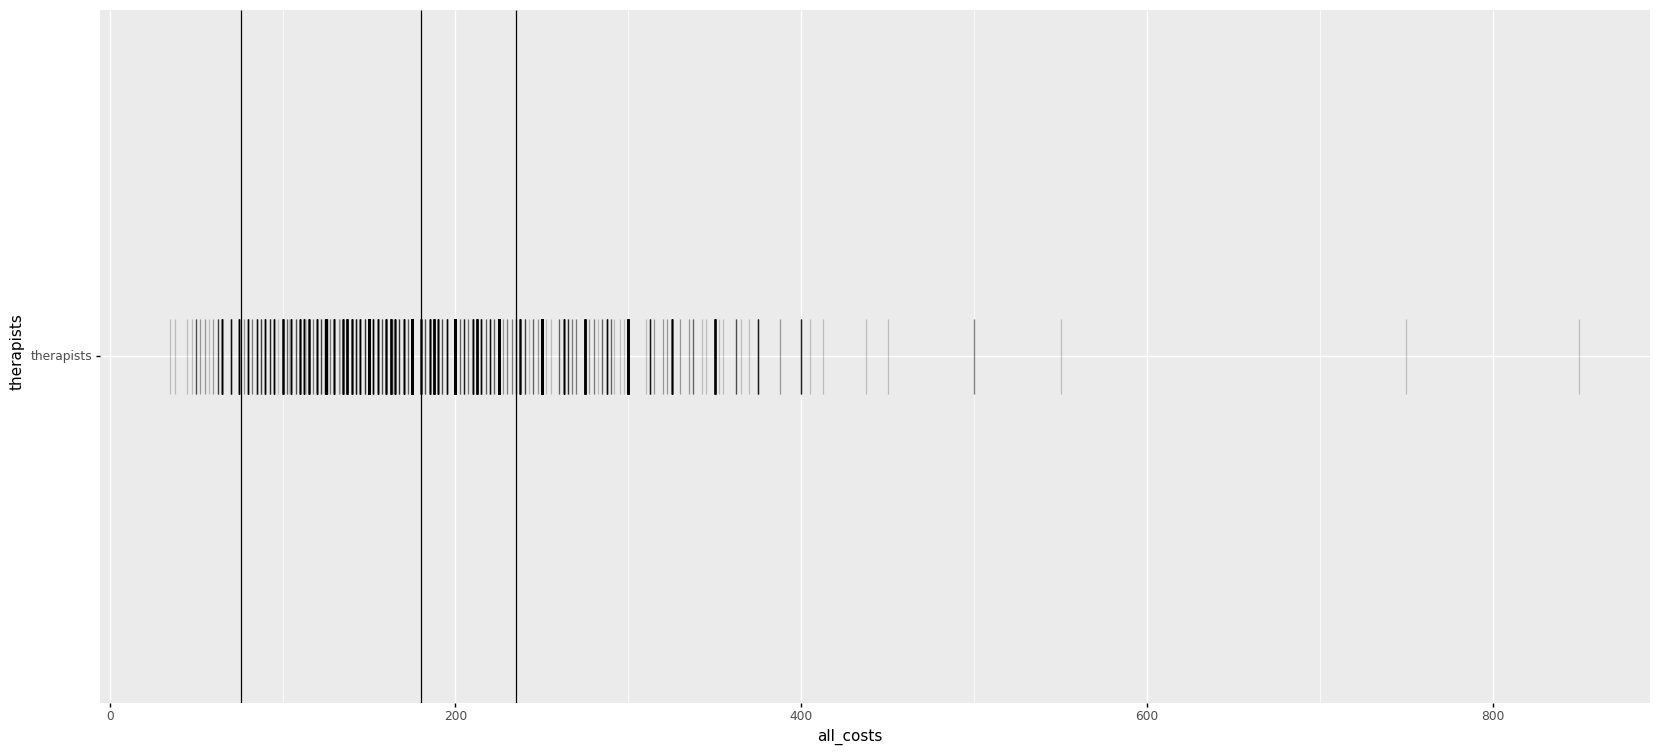

<ggplot: (348092371)>

In [182]:
chart = (
    ggplot(costs, aes(x='all_costs',y="therapists"))
        + geom_point(alpha=.2,size=30,shape='|')
        + geom_vline(aes(xintercept=76))
        + geom_vline(aes(xintercept=180))
        + geom_vline(aes(xintercept=235))
        + theme(figure_size=(20,9))
        
)
chart

In [ ]:
chart.save('average-costs-psychology-today.svg')

In [58]:
df[(df.cost_high < 1000)].sort_values('cost_low')

,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session,cost_range,cost_low,cost_high,cost_base,cost_limit,average_cost
1096,https://www.psychologytoday.com/us/therapists/...,The Child & Family Institute,"Psychologist, PhD",(914) 265-2066,"New York, NY 10017","Hi, I'm Dr. Adam Weissman, Founder, Director, ...",Verified,10017,\n\n\n\nCost per Session: $5 - $450\n ...,$5 - $450,$5 - $450,5.0,450.0,0.0,0.0,227.5
3025,https://www.psychologytoday.com/us/therapists/...,The Child & Family Institute,"Psychologist, PhD",(914) 265-2066,"Office is near: Brooklyn, NY 11237","Hi, I'm Dr. Adam Weissman, Founder, Director, ...",Verified,11237,\n\n\n\nCost per Session: $5 - $450\n ...,$5 - $450,$5 - $450,5.0,450.0,0.0,0.0,227.5
1976,https://www.psychologytoday.com/us/therapists/...,The Child & Family Institute,"Psychologist, PhD",(914) 265-2066,"Office is near: Brooklyn, NY 11237","Hi, I'm Dr. Adam Weissman, Founder, Director, ...",Verified,11237,\n\n\n\nCost per Session: $5 - $450\n ...,$5 - $450,$5 - $450,5.0,450.0,0.0,0.0,227.5
1357,https://www.psychologytoday.com/us/therapists/...,Ingrid Ma,LPC Intern,(516) 217-3899,"Office is near: New York, NY 10069",Ingrid Ma is a mental health counselor practic...,Verified,10069,\n\n\n\nCost per Session: $5 - $100\n ...,$5 - $100,$5 - $100,5.0,100.0,0.0,0.0,52.5
2072,https://www.psychologytoday.com/us/therapists/...,Alicia Boykin,LPC Intern,(516) 217-0952,"Office is near: Brooklyn, NY 11231",Alicia Boykin began her studies in Behavioral ...,Verified,11231,\n\n\n\nCost per Session: $5 - $100\n ...,$5 - $100,$5 - $100,5.0,100.0,0.0,0.0,52.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,https://www.psychologytoday.com/us/therapists/...,Jennifer Musico,"Psychologist, PsyD",(646) 791-3175,"Office is near: New York, NY 10169",Once you have made the decision to seek therap...,Verified,10169,\n\n\n\nCost per Session: $350 - $500\n ...,$350 - $500,$350 - $500,350.0,500.0,0.0,0.0,425.0
209,https://www.psychologytoday.com/us/therapists/...,Cindy L Breitman,"Psychologist, PhD, ABPP-CN",(646) 386-2194 x301,"New York, NY 10018",I am a board certified clinical neuropsycholog...,Verified,10018,\n\n\n\nCost per Session: $375 - $550\n ...,$375 - $550,$375 - $550,375.0,550.0,0.0,0.0,462.5
617,https://www.psychologytoday.com/us/therapists/...,Amy Pizer,"Clinical Social Work/Therapist, PhD",(646) 386-2272,"New York, NY 10021",I have over twenty-five years of experience in...,Verified,10021,\n\n\n\nCost per Session: $400 - $600\n ...,$400 - $600,$400 - $600,400.0,600.0,0.0,0.0,500.0
3049,https://www.psychologytoday.com/us/therapists/...,Amy Pizer,"Clinical Social Work/Therapist, PhD",(646) 386-2272,"Office is near: New York, NY 10028",I have over twenty-five years of experience in...,Verified,10028,\n\n\n\nCost per Session: $400 - $600\n ...,$400 - $600,$400 - $600,400.0,600.0,0.0,0.0,500.0


In [51]:
df[(df.cost_high < 1000)].groupby("zip").name.nunique().to_frame().reset_index().merge(df[(df.cost_high < 1000)].groupby("zip").average_cost.mean().round().to_frame().reset_index(),how='left',left_on="zip",right_on='zip').to_csv("providers-zip-average-costs.csv",index=False)

In [ ]:
df[(df.cost_high < 1000)].groupby("zip")

In [242]:
def sliding_scale(finances):
    query = re.findall(r"Sliding Scale:.*",finances)
    if len(query) > 0:
        return query[0]
    else:
        return None

In [87]:
df['sliding_scale'] = df.finances.apply(sliding_scale)

In [88]:
df.sliding_scale = df.sliding_scale.str.split(":").str[1]

 150     80
 200     48
 100     33
 250     33
 175     22
         ..
 165+     1
 235+     1
 35       1
 30       1
 235      1
Name: cost_low, Length: 71, dtype: int64

In [64]:
def accepted_insurance(finances):
    query = re.findall(r"Accepted Insurance Plans",finances)
    if len(query) > 0:
        return 'Yes'
    else:
        return None

In [65]:
df['insurance_plans'] = df.finances.apply(accepted_insurance)

In [ ]:
for finance in df.finances:
    print(finance)